Keras CNN (Multi-Class Classification)

In [28]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Load And Preprocess

In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('CIFAR10 Dataset: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#Normalizing pixels
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

#One HOt Encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


CIFAR10 Dataset:  (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


CIFAR10 class names

In [30]:
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

CNN Model

In [31]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Train and Evaluate

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
train = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.2712 - loss: 1.9401 - val_accuracy: 0.5103 - val_loss: 1.3629
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.4903 - loss: 1.4009 - val_accuracy: 0.5791 - val_loss: 1.1817
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.5668 - loss: 1.2180 - val_accuracy: 0.6200 - val_loss: 1.0625
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.6141 - loss: 1.0849 - val_accuracy: 0.6249 - val_loss: 1.0585
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.6458 - loss: 1.0079 - val_accuracy: 0.6609 - val_loss: 0.9576
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.6733 - loss: 0.9398 - val_accuracy: 0.6808 - val_loss: 0.9112
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.6903 - loss: 0.8811 - val_accuracy: 0.6792 - val_loss: 0.9201
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.7102 - loss: 0.8338 

Visualization (training and validation loss/accuracy)

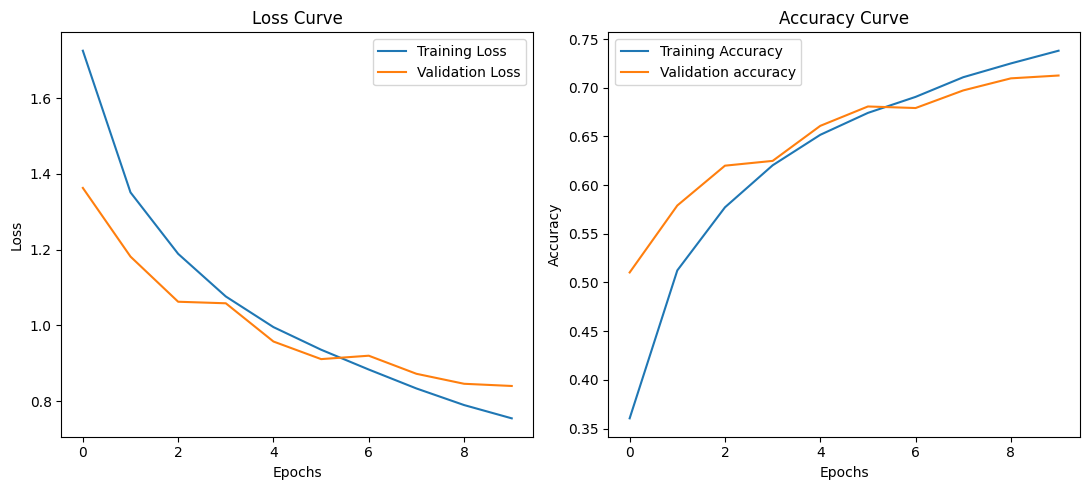

In [33]:
import matplotlib.pyplot as plt

#PLot Loss curve
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['loss'], label='Training Loss')
plt.plot(train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

#PLot Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.tight_layout()
plt.show()

Classification report

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# predictions for confusion matrix
X_sample = X_test[0:1]

y_pred = model.predict(X_sample)
y_sample_true = np.argmax(y_test[0:1], axis=1)
y_pred_label = np.argmax(y_pred, axis=1)

print("Predicted Label:" ,y_pred_label)
print("True Label:" ,y_sample_true)


print(classification_report(y_sample_true, y_pred_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Label: [3]
True Label: [3]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



For entire test set

In [35]:
y_pred = model.predict(X_test)   # Shape: (10000, 10)
y_true = np.argmax(y_test, axis=1)
y_pred_label = np.argmax(y_pred, axis=1)


print(classification_report(y_true, y_pred_label, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

    Airplane       0.64      0.81      0.71      1000
  Automobile       0.84      0.84      0.84      1000
        Bird       0.61      0.60      0.60      1000
         Cat       0.55      0.50      0.52      1000
        Deer       0.69      0.63      0.66      1000
         Dog       0.74      0.52      0.61      1000
        Frog       0.75      0.82      0.78      1000
       Horse       0.74      0.77      0.75      1000
        Ship       0.76      0.83      0.80      1000
       Truck       0.81      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



Confusion matrix

In [36]:
y_true.shape, y_pred_label.shape

((10000,), (10000,))

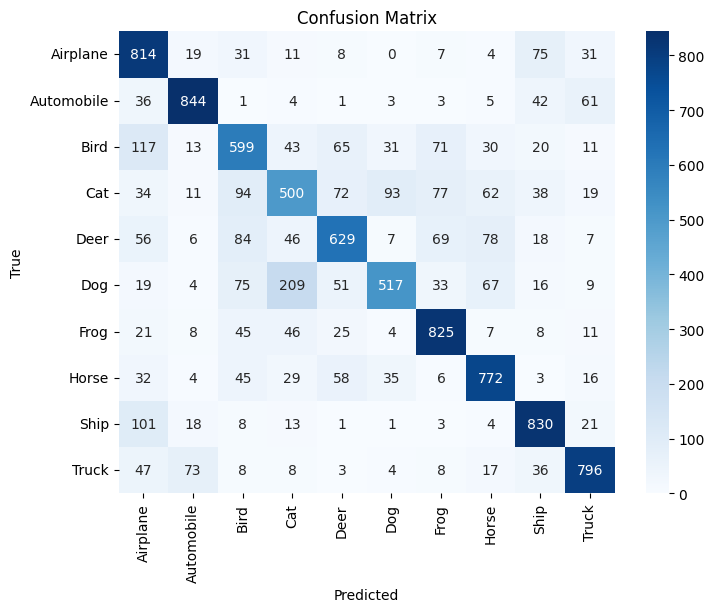

In [37]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_label)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()